# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

In [88]:
correlation_matrix = data.corr()
correlation_matrix

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
GrLivArea,1.000000,0.519712,0.100093,-0.078781,0.040196,0.093068,0.707685,0.284965,-0.150300,0.081731,-0.252809,-0.067608,0.031901
BedroomAbvGr,0.519712,1.000000,0.198597,0.012980,0.044207,0.007872,0.168213,-0.005864,0.006672,-0.008591,0.009897,-0.061921,-0.030000
KitchenAbvGr,0.100093,0.198597,1.000000,-0.087001,-0.009704,-0.246797,-0.135907,-0.104644,0.152515,-0.107387,0.118812,-0.035697,0.008864
OverallCond,-0.078781,0.012980,-0.087001,1.000000,-0.065288,0.118969,-0.077856,-0.133177,-0.009690,-0.090723,0.203629,-0.010099,-0.092479
RoofSurface,0.040196,0.044207,-0.009704,-0.065288,1.000000,-0.039724,0.017944,0.017083,-0.069464,0.017535,0.001309,0.005978,0.017677
CentralAir,0.093068,0.007872,-0.246797,0.118969,-0.039724,1.000000,0.251328,0.142203,-0.251471,0.162085,-0.155776,-0.020429,-0.038481
SalePrice,0.707685,0.168213,-0.135907,-0.077856,0.017944,0.251328,1.000000,0.419678,-0.236832,0.169792,-0.410608,-0.055101,0.036300
GarageFinish_Fin,0.284965,-0.005864,-0.104644,-0.133177,0.017083,0.142203,0.419678,1.000000,-0.136604,-0.359384,-0.474129,0.010378,0.002865
GarageFinish_NoGarage,-0.150300,0.006672,0.152515,-0.009690,-0.069464,-0.251471,-0.236832,-0.136604,1.000000,-0.154532,-0.203871,0.019627,0.013858
GarageFinish_RFn,0.081731,-0.008591,-0.107387,-0.090723,0.017535,0.162085,0.169792,-0.359384,-0.154532,1.000000,-0.536355,-0.002677,0.033818


/tmp/ipykernel_58734/1309604514.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/home/andreza/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


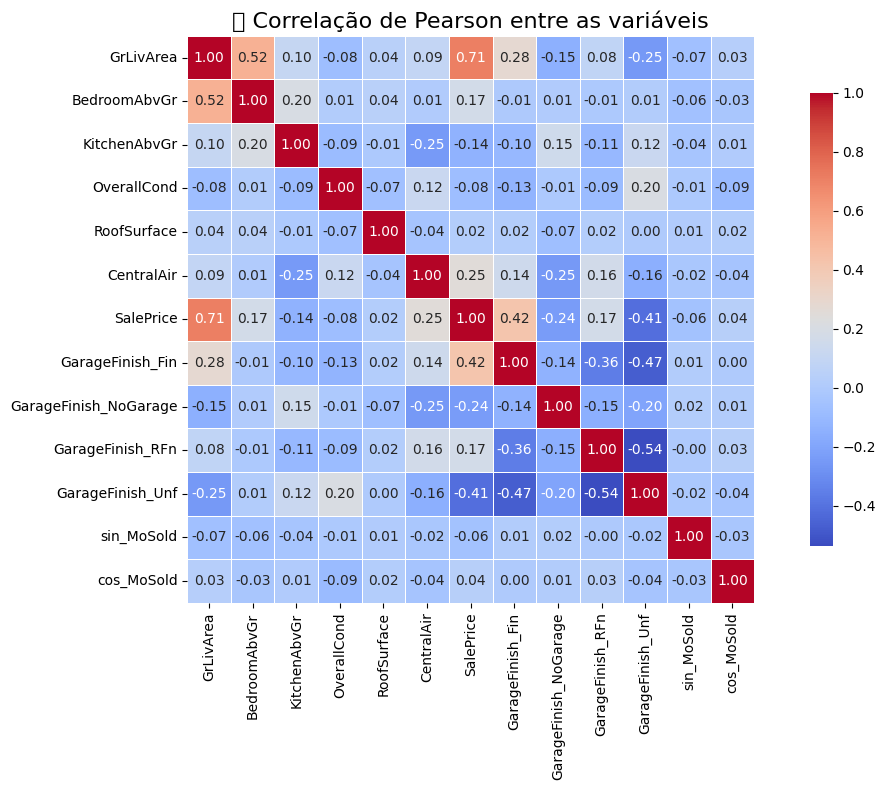

In [89]:
plt.figure(figsize=(12, 8))


sns.heatmap(correlation_matrix, 
            annot=True,            
            cmap='coolwarm',       
            fmt=".2f",            
            square=True,          
            linewidths=0.5,       
            cbar_kws={"shrink": 0.8})  

# Título do gráfico
plt.title('📊 Correlação de Pearson entre as variáveis', fontsize=16)

# Mostra o gráfico
plt.tight_layout()
plt.show()

❓ Visualize the correlation between column pairs in a dataframe ❓

In [90]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()
# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

In [91]:
corr_df

,feature_1,feature_2,correlation
0,GrLivArea,GrLivArea,1.000000
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040196
...,...,...,...
164,cos_MoSold,GarageFinish_NoGarage,0.013858
165,cos_MoSold,GarageFinish_RFn,0.033818
166,cos_MoSold,GarageFinish_Unf,-0.040048
167,cos_MoSold,sin_MoSold,-0.030816


In [92]:
# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [93]:
corr_df

,feature_1,feature_2,correlation
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040196
5,GrLivArea,CentralAir,0.093068
...,...,...,...
163,cos_MoSold,GarageFinish_Fin,0.002865
164,cos_MoSold,GarageFinish_NoGarage,0.013858
165,cos_MoSold,GarageFinish_RFn,0.033818
166,cos_MoSold,GarageFinish_Unf,-0.040048


In [106]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

/tmp/ipykernel_58734/2299742206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [95]:
correlated_features = corr_df[corr_df['absolute_correlation']>0.9].count()
correlated_features = correlated_features[0]

🧪 **Test your code**

In [105]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features=correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [108]:
X = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [111]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv_results = cross_validate(model, X_train, y_train, cv=5)
base_model_score = cv_results['test_score'].mean()

🧪 **Test your code**

In [112]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score=base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [119]:
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression()
np.mean(cross_val_score(log_model, X, y , cv=5))

/home/andreza/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.015753424657534244

In [127]:
from sklearn.inspection import permutation_importance
log_model = log_model.fit(X, y)  # Treina o modelo
permutation_score = permutation_importance(log_model, X, y, n_repeats=10)

In [128]:
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)
importance_df.columns = ['feature', 'score decrease']
importance_df.sort_values(by="score decrease", ascending=False)

,feature,score decrease
0,GrLivArea,0.021644
9,GarageFinish_Unf,0.01137
11,cos_MoSold,0.011027
10,sin_MoSold,0.008356
5,CentralAir,0.007192
6,GarageFinish_Fin,0.006712
8,GarageFinish_RFn,0.005753
4,RoofSurface,0.004863
7,GarageFinish_NoGarage,0.002055
3,OverallCond,0.001986


❓ Which feature is the most important ❓
*Save your answer as a `string` under variable name `best_feature`.*

In [125]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [126]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature=best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [140]:
X = data.drop(['SalePrice','KitchenAbvGr'],axis=1)
y = data['SalePrice']

In [141]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv_results = cross_validate(model, X_train, y_train, cv=5)
simplified_model_score = cv_results['test_score'].mean()
simplified_model_score

0.602092472676054

🧪 **Test your code**

In [142]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score=simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!